In [1]:
import pandas as pd
df = pd.read_csv('combined_stock_data.csv')
df.columns = df.columns.str.strip()
df.head()

,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,EQ,"1,798.00","1,805.00","1,759.20","1,797.65","1,790.00","1,786.85","1,783.47","2,018.95",815.55,"5,17,699","92,33,01,961.85","46,650"
1,EQ,363.2,372.6,363.2,363.2,368.9,369.05,368.66,374.5,171.85,"2,78,92,188","10,28,27,22,918.85","3,41,507"
2,EQ,"1,800.00","1,898.80","1,800.00","1,808.40","1,854.00","1,840.80","1,856.35","2,417.75",469.0,"18,39,671","3,41,50,65,883.50","66,672"
3,EQ,310.5,322.45,305.9,310.55,321.4,320.75,318.08,322.45,191.7,"1,67,15,887","5,31,69,40,100.70","1,47,506"
4,EQ,632.1,646.35,631.0,629.55,635.55,638.25,640.53,650.0,240.0,"29,27,025","1,87,48,37,413.00","77,228"


In [2]:
df.columns

Index(['series', 'OPEN', 'HIGH', 'LOW', 'PREV. CLOSE', 'ltp', 'close', 'vwap',
       '52W H', '52W L', 'VOLUME', 'VALUE', 'No of trades'],
      dtype='object')

In [3]:
df.shape

(5860, 13)

In [4]:
df.size

76180

In [7]:
df.isnull().sum()

series          0
OPEN            0
HIGH            0
LOW             0
PREV. CLOSE     0
ltp             0
close           0
vwap            0
52W H           0
52W L           0
VOLUME          0
VALUE           0
No of trades    0
close_lag_1     0
close_lag_2     0
SMA_5           0
SMA_10          0
volatility_5    0
daily_return    0
dtype: int64

In [5]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

cols_to_convert = ['OPEN', 'HIGH', 'LOW', 'PREV. CLOSE', 'ltp', 'close', 'vwap',
                   '52W H', '52W L', 'VOLUME', 'VALUE']
for col in cols_to_convert:
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)
df.dropna(inplace=True)

In [6]:
df['close_lag_1'] = df['close'].shift(1)
df['close_lag_2'] = df['close'].shift(2)

df['SMA_5'] = df['close'].rolling(window=5).mean()
df['SMA_10'] = df['close'].rolling(window=10).mean()

df['volatility_5'] = df['close'].rolling(window=5).std()
df['daily_return'] = df['close'].pct_change()

df.dropna(inplace=True)


In [8]:
features = ['OPEN', 'HIGH', 'LOW', 'PREV. CLOSE', 'ltp', 'close', 'vwap',
            '52W H', '52W L', 'VOLUME', 'VALUE', 'close_lag_1', 'close_lag_2',
            'SMA_5', 'SMA_10', 'volatility_5', 'daily_return']

scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])


In [9]:
X = df[features].drop(columns=['close'])
y = df['close']

Epoch 1/10


c:\Users\dheba\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


145/145 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.0335 - val_loss: 0.0124
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0317 - val_loss: 0.0105
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0310 - val_loss: 0.0088
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0291 - val_loss: 0.0169
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0293 - val_loss: 0.0089
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0298 - val_loss: 0.0092
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0305 - val_loss: 0.0087
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0292 - val_loss: 0.0077
Epoch 9/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0277 - val_loss: 0.0098
Epoch 10/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0260 - val_loss: 0.0099
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Mean Absolute Error (MAE): 0.08559613420299855
Mean Squared Error (MSE): 0.00991559715427105
Root Me

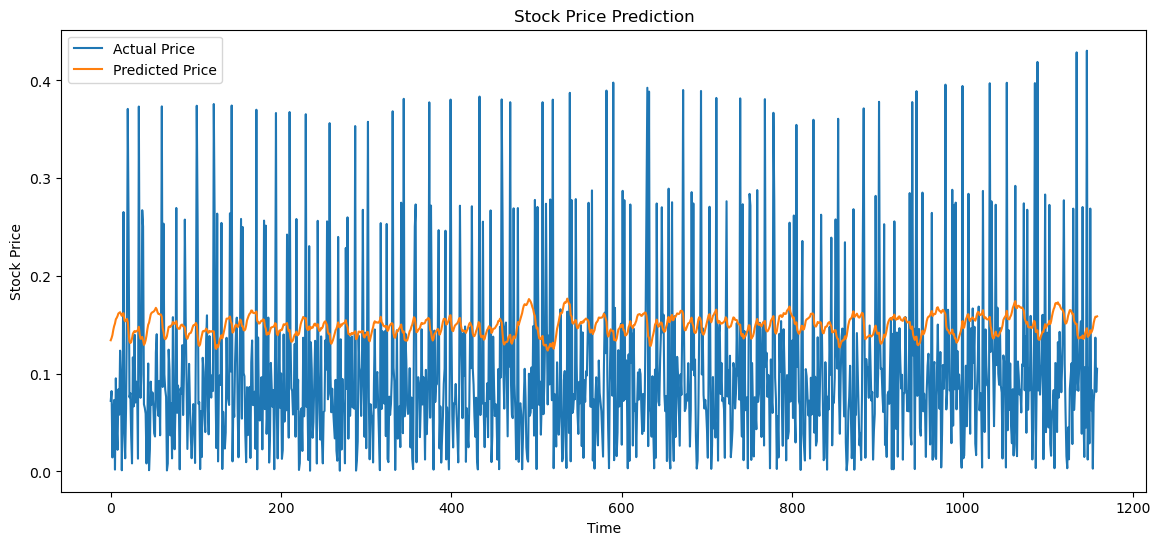

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted next stock price from last 60 closing prices: 0.159184992313385


In [10]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error
import math

if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')

data = df[['close']].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i - time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(actual, predictions)
mse = mean_squared_error(actual, predictions)
rmse = math.sqrt(mse)
r2 = r2_score(actual, predictions)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")
rmse = math.sqrt(mean_squared_error(actual, predictions))
print("Root Mean Squared Error (RMSE):", rmse)

plt.figure(figsize=(14, 6))
plt.plot(actual, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

def predict_next_price(manual_input):
    if len(manual_input) != 60:
        raise ValueError("Input must contain exactly 60 closing prices.")

    manual_input = np.array(manual_input).reshape(-1, 1)
    scaled_input = scaler.transform(manual_input)
    scaled_input = np.reshape(scaled_input, (1, 60, 1))
    pred_scaled = model.predict(scaled_input)
    pred_price = scaler.inverse_transform(pred_scaled)

    return float(pred_price[0][0])

last_60 = df['close'].values[-60:]
predicted = predict_next_price(last_60)
print("Predicted next stock price from last 60 closing prices:", predicted)


In [11]:
your_input = [
    101.5, 102.1, 100.7, 99.4, 98.3, 100.2, 101.0, 101.3, 102.4, 103.0,
    103.5, 104.2, 103.9, 102.7, 101.9, 100.5, 99.8, 99.0, 98.6, 98.3,
    98.7, 99.2, 99.9, 100.3, 100.8, 101.5, 102.0, 102.6, 103.1, 103.9,
    104.6, 105.2, 104.8, 104.4, 104.0, 103.5, 103.1, 102.8, 102.3, 101.9,
    101.6, 101.2, 100.9, 100.5, 100.2, 99.8, 99.5, 99.3, 99.0, 98.8,
    98.5, 98.3, 98.1, 98.0, 97.9, 97.8, 97.7, 97.6, 97.5, 97.4
]
predicted = predict_next_price(your_input)
print("Predicted next price:", predicted)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted next price: -0.3328336775302887
